# Load and analyze the dataset

In [3]:
from datasets import load_dataset
dataset = load_dataset("go_emotions")

print(dataset)

print(f"Training data size:{len(dataset['train'])}")
print(f"Validation data size:{len(dataset['validation'])}")
print(f"Test data size:{len(dataset['test'])}")

print(dataset['train'][0])

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})
Training data size:43410
Validation data size:5426
Test data size:5427
{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}


## Label distribution and class imbalance

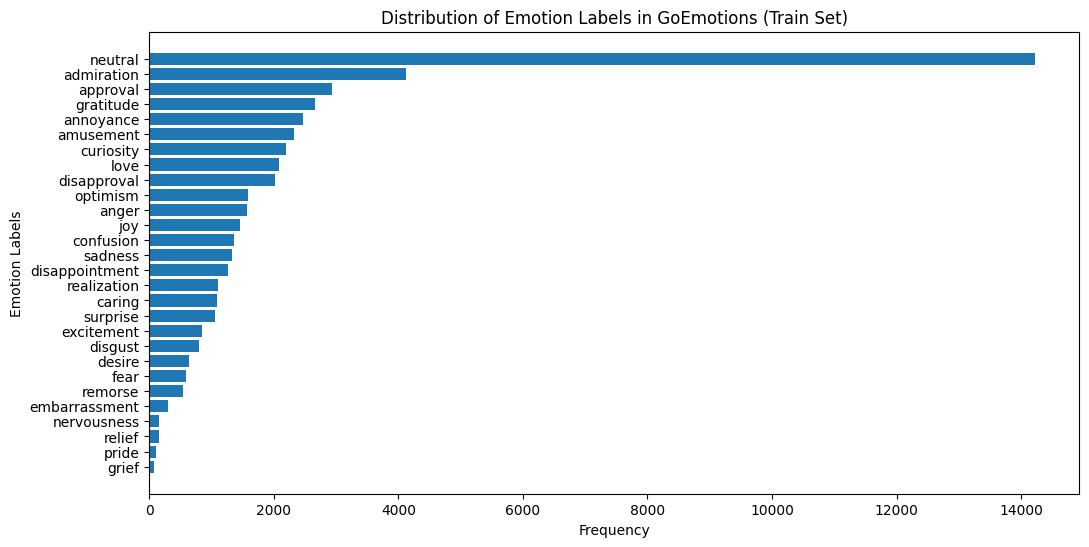

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

label_names = dataset['train'].features['labels'].feature.names

label_counts = Counter()

for x in dataset['train']:
    for label in x['labels']:
        label_counts[label] += 1

sorted_labels = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12,6))
plt.barh([label_names[i] for i, _ in sorted_labels], [count for _, count in sorted_labels])
plt.xlabel("Frequency")
plt.ylabel("Emotion Labels")
plt.title("Distribution of Emotion Labels in GoEmotions (Train Set)")
plt.gca().invert_yaxis()
plt.show()

         num_labels
count  43410.000000
mean       1.177217
std        0.417699
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000


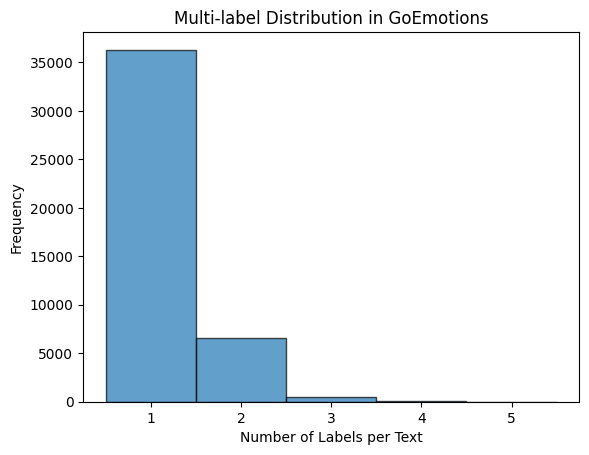

In [5]:
import pandas as pd

num_labels = [len(example["labels"]) for example in dataset['train']]
df = pd.DataFrame(num_labels, columns=["num_labels"])

print(df.describe())

plt.hist(num_labels, bins=np.arange(1, max(num_labels)+2)-0.5, edgecolor='black', alpha=0.7)
plt.xlabel("Number of Labels per Text")
plt.ylabel("Frequency")
plt.title("Multi-label Distribution in GoEmotions")
plt.xticks(range(1, max(num_labels)+1))
plt.show()

Min: 1, Max: 33, Mean: 12.840175074867542, Median: 12.0


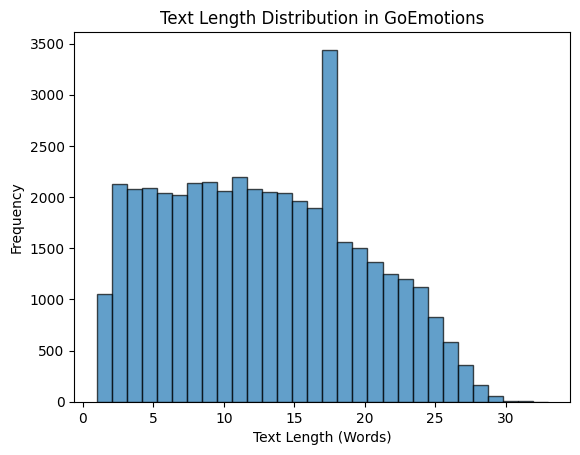

In [6]:
text_lengths = [len(example["text"].split()) for example in dataset["train"]]

print(f"Min: {np.min(text_lengths)}, Max: {np.max(text_lengths)}, Mean: {np.mean(text_lengths)}, Median: {np.median(text_lengths)}")

plt.hist(text_lengths, bins=30, alpha=0.7, edgecolor="black")
plt.xlabel("Text Length (Words)")
plt.ylabel("Frequency")
plt.title("Text Length Distribution in GoEmotions")
plt.show()

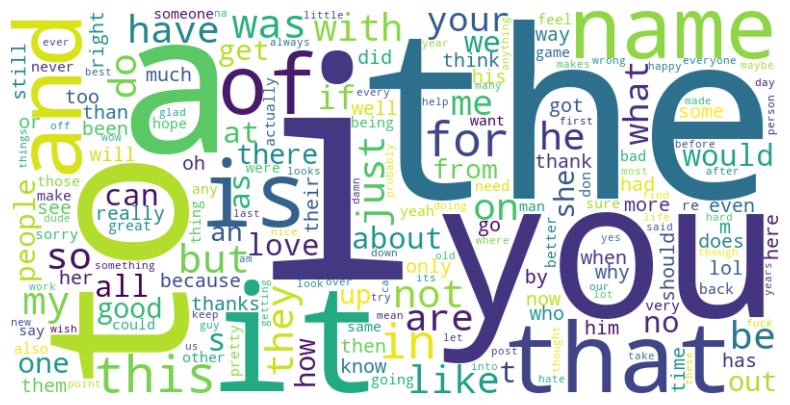

In [7]:
from wordcloud import WordCloud
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Get all text from dataset
all_text = " ".join([example["text"] for example in dataset["train"]])

# Tokenize and remove stopwords
tokens = nltk.word_tokenize(all_text)
filtered_words = [word.lower() for word in tokens if word.isalpha()]

# Use Counter to get word frequencies
word_counts = Counter(filtered_words)

# Generate word cloud using the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

# Show word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
print(sorted_labels[:5])  # Top 5 most frequent emotions
print(sorted_labels[-5:])  # Bottom 5 least frequent emotions

[(27, 14219), (0, 4130), (4, 2939), (15, 2662), (3, 2470)]
[(12, 303), (19, 164), (23, 153), (21, 111), (16, 77)]


In [9]:
label_names = dataset["train"].features["labels"].feature.names
top_5 = sorted_labels[:5]
bottom_5 = sorted_labels[-5:]

top_df = pd.DataFrame(top_5, columns=["Label Index", "Count"])
top_df["Emotion"] = top_df["Label Index"].apply(lambda x: label_names[x])
top_df["Type"] = "Top 5"

bottom_df = pd.DataFrame(bottom_5, columns=["Label Index", "Count"])
bottom_df["Emotion"] = bottom_df["Label Index"].apply(lambda x: label_names[x])
bottom_df["Type"] = "Bottom 5"

# Combine both
summary_df = pd.concat([top_df, bottom_df], ignore_index=True)

# Reorder columns for readability
summary_df = summary_df[["Type", "Emotion", "Label Index", "Count"]]

print(summary_df)

       Type        Emotion  Label Index  Count
0     Top 5        neutral           27  14219
1     Top 5     admiration            0   4130
2     Top 5       approval            4   2939
3     Top 5      gratitude           15   2662
4     Top 5      annoyance            3   2470
5  Bottom 5  embarrassment           12    303
6  Bottom 5    nervousness           19    164
7  Bottom 5         relief           23    153
8  Bottom 5          pride           21    111
9  Bottom 5          grief           16     77


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>


Total words: 554689
Total stopwords: 278085
Stopword ratio: 0.50
Top 20 most frequent words overall:
i: 20744
the: 17983
to: 12584
a: 12328
you: 11439
it: 10625
that: 9768
and: 9026
is: 8788
name: 7904
of: 7116
this: 6547
in: 5805
for: 5737
was: 4123
my: 3779
not: 3739
but: 3672
be: 3574
on: 3542

Top stopwords in the top 20 words:
i: 20744
the: 17983
to: 12584
a: 12328
you: 11439
it: 10625
that: 9768
and: 9026
is: 8788
of: 7116
this: 6547
in: 5805
for: 5737
was: 4123
my: 3779
not: 3739
but: 3672
be: 3574
on: 3542


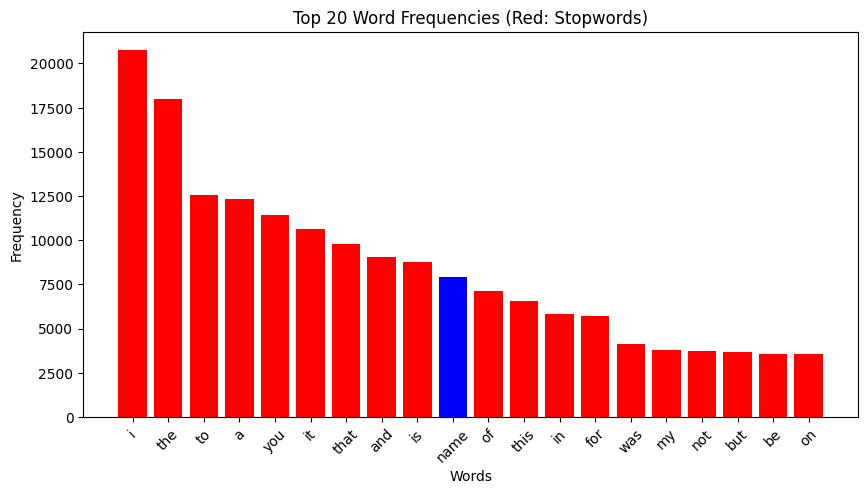

In [10]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download required resources if not already done
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words("english"))

all_words = []
for example in dataset["train"]:
    tokens = nltk.word_tokenize(example["text"])
    words = [word.lower() for word in tokens if word.isalpha()]
    all_words.extend(words)

# Create a counter for overall word frequency
word_counter = Counter(all_words)

total_words = sum(word_counter.values())

stopword_count = sum(count for word, count in word_counter.items() if word in stop_words)
stopword_ratio = stopword_count / total_words

print(f"Total words: {total_words}")
print(f"Total stopwords: {stopword_count}")
print(f"Stopword ratio: {stopword_ratio:.2f}")

# Get the top 20 most common words overall
top_20 = word_counter.most_common(20)
print("Top 20 most frequent words overall:")
for word, count in top_20:
    print(f"{word}: {count}")

# Filter out the top stopwords from the top 20 list
top_stopwords = [(word, count) for word, count in top_20 if word in stop_words]
print("\nTop stopwords in the top 20 words:")
for word, count in top_stopwords:
    print(f"{word}: {count}")

# Visualize the top 20 words, highlighting stopwords in red
words, counts = zip(*top_20)
colors = ['red' if word in stop_words else 'blue' for word in words]

plt.figure(figsize=(10,5))
plt.bar(words, counts, color=colors)
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Word Frequencies (Red: Stopwords)")
plt.show()

## Data Preprocessing

In [11]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_data(text):
    return tokenizer(text["text"], padding="max_length", truncation=True, max_length=128)

tokenize_dataset = dataset.map(tokenize_data, batched=True)
print(tokenize_dataset.column_names)

{'train': ['text', 'labels', 'id', 'input_ids', 'token_type_ids', 'attention_mask'], 'validation': ['text', 'labels', 'id', 'input_ids', 'token_type_ids', 'attention_mask'], 'test': ['text', 'labels', 'id', 'input_ids', 'token_type_ids', 'attention_mask']}


In [12]:
label_names = dataset["train"].features["labels"].feature.names

def process_labels(example):
    label_vector = [0.0] * len(label_names)
    for label in example["labels"]:
        label_vector[label] = 1.0
    example["labels"] = label_vector
    return example

processed_dataset = tokenize_dataset.map(process_labels)

In [13]:
from datasets import Sequence, Value

# Force the 'labels' column to be a sequence of float32s
processed_dataset = processed_dataset.cast_column("labels", Sequence(Value("float32")))

In [14]:
def force_tensor_types(example):
    import torch
    return {
        "input_ids": torch.tensor(example["input_ids"], dtype=torch.long),
        "attention_mask": torch.tensor(example["attention_mask"], dtype=torch.long),
        "labels": torch.tensor(example["labels"], dtype=torch.float)
    }

processed_dataset = processed_dataset.map(force_tensor_types)

Map: 100%|██████████| 5427/5427 [00:00<00:00, 11566.57 examples/s]


In [15]:
columns = ["input_ids", "attention_mask", "labels"]

processed_dataset["train"].set_format(type="torch", columns=columns)
processed_dataset["validation"].set_format(type="torch", columns=columns)
processed_dataset["test"].set_format(type="torch", columns=columns)

train_dataset = processed_dataset["train"]
val_dataset = processed_dataset["validation"]
test_dataset = processed_dataset["test"]

In [16]:
sample = train_dataset[0]
print("input_ids dtype:", sample["input_ids"].dtype)        # should be torch.int64
print("attention_mask dtype:", sample["attention_mask"].dtype)  # should be torch.int64
print("labels dtype:", sample["labels"].dtype)              # should be torch.float32

input_ids dtype: torch.int64
attention_mask dtype: torch.int64
labels dtype: torch.float32


## Loading BERT

In [17]:
import torch
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# Number of labels (28 total: 27 emotions + neutral)
num_labels = len(label_names)

# Load BERT for multi-label classification
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=num_labels,
    problem_type="multi_label_classification"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
import numpy as np
import torch
from sklearn.metrics import f1_score, accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred

    # Convert logits to probabilities
    probs = torch.sigmoid(torch.tensor(logits))

    # Binarize predictions at 0.5
    preds = (probs > 0.5).int().numpy()
    labels = torch.tensor(labels).int().numpy()

    # Micro F1 score
    f1_micro = f1_score(labels, preds, average="micro")
    subset_acc = np.mean(np.all(preds == labels, axis=1))

    return {
        "f1_micro": f1_micro,
        "subset_accuracy": subset_acc
    }

In [19]:
# Define hyperparameters & logging
training_args = TrainingArguments(
    output_dir="./results",          # Where to save model checkpoints
    evaluation_strategy="epoch",     # Evaluate each epoch
    save_strategy="epoch",           # Save model each epoch
    num_train_epochs=3,              # You can tune this
    per_device_train_batch_size=16,  # Adjust based on GPU memory
    per_device_eval_batch_size=16,
    learning_rate=2e-5,             # Typical fine-tuning LR for BERT
    weight_decay=0.01,              # Regularization
    logging_steps=100,              # Log every 100 steps
    load_best_model_at_end=True,     # Useful if you want the best model
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,   # from your processed_dataset
    eval_dataset=val_dataset,      # from your processed_dataset
    compute_metrics=compute_metrics
)

/Users/sanshritbakshi/PycharmProjects/Sanshrit.Bakshi.HW3/.venv1/lib/python3.10/site-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [25]:
# Train the model
trainer.train()

# Evaluate on validation set
val_metrics = trainer.evaluate()
print("Validation metrics:", val_metrics)

# Evaluate on test set
test_metrics = trainer.evaluate(test_dataset)
print("Test metrics:", test_metrics)

RuntimeError: result type Float can't be cast to the desired output type Long

In [20]:
small_train = train_dataset.select(range(2000))
small_val = val_dataset.select(range(500))

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train,
    eval_dataset=small_val,
    compute_metrics=compute_metrics
)

trainer.train()

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [43]:
val_metrics = trainer.evaluate()
print("Validation metrics:", val_metrics)

test_metrics = trainer.evaluate(test_dataset)
print("Test metrics:", test_metrics)

Validation metrics: {'eval_loss': 0.13301019370555878, 'eval_f1_micro': 0.31778058007566207, 'eval_subset_accuracy': 0.216, 'eval_runtime': 4.0604, 'eval_samples_per_second': 123.141, 'eval_steps_per_second': 7.881, 'epoch': 3.0}
Test metrics: {'eval_loss': 0.1266833245754242, 'eval_f1_micro': 0.35392596085828815, 'eval_subset_accuracy': 0.24064860880781277, 'eval_runtime': 43.8784, 'eval_samples_per_second': 123.683, 'eval_steps_per_second': 7.749, 'epoch': 3.0}


In [48]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e